Muhammad Hamza Zafar
Student ID : 22022247

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create data generators with data augmentation for training
datagen = ImageDataGenerator(
    width_shift_range=0.1,        # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,       # Randomly shift images vertically (fraction of total height)
    horizontal_flip=True,         # Randomly flip images horizontally
    zoom_range=0.2                # Randomly zoom inside images (by a factor of 0.2)
)

datagen.fit(x_train)

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Load MobileNetV2 base model (without the top FC layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Create a new model on top
frozen_model = Sequential()
frozen_model.add(base_model)
frozen_model.add(GlobalAveragePooling2D())
frozen_model.add(Dense(256, activation='relu'))
frozen_model.add(Dense(10, activation='softmax'))

# Freeze the base MobileNetV2 layers
base_model.trainable = False

# Compile the model
frozen_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with frozen base layers
history_frozen = frozen_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                            steps_per_epoch=len(x_train) / 32, epochs=10,
                            validation_data=(x_test, y_test))



9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
1562/1562 [==============================] - 46s 26ms/step - loss: 1.9366 - accuracy: 0.2977 - val_loss: 1.8741 - val_accuracy: 0.3205
Epoch 2/10
1562/1562 [==============================] - 39s 25ms/step - loss: 1.8556 - accuracy: 0.3276 - val_loss: 1.8406 - val_accuracy: 0.3312
Epoch 3/10
1562/1562 [==============================] - 39s 25ms/step - loss: 1.8288 - accuracy: 0.3333 - val_loss: 1.8171 - val_accuracy: 0.3486
Epoch 4/10
1562/1562 [==============================] - 39s 25ms/step - loss: 1.8134 - accuracy: 0.3439 - val_loss: 1.7995 - val_accuracy: 0.3512
Epoch 5/10
1562/1562 [==============================] - 39s 25ms/step - loss: 1.8026 - accuracy: 0.3452 - val_loss: 1.7872 - val_accuracy: 0.3572
Epoch 6/10
1562/1562 [==============================] - 39s 25ms/step - loss: 1.7973 - accuracy: 0.3468 - val_loss: 1.7979 - val_accuracy: 0.3523
Epoch 7/10
1562/1562 [==============================] - 38s 2

In [4]:
# Create a new model on top
unfrozen_model = Sequential()
unfrozen_model.add(base_model)
unfrozen_model.add(GlobalAveragePooling2D())
unfrozen_model.add(Dense(256, activation='relu'))
unfrozen_model.add(Dense(10, activation='softmax'))

# Unfreeze some layers of base MobileNetV2 for fine-tuning
base_model.trainable = True

# Fine-tune the model
unfrozen_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training with fine-tuning
history_fine_tuned = unfrozen_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                               steps_per_epoch=len(x_train) / 32, epochs=10,
                               validation_data=(x_test, y_test))

Epoch 1/10
1562/1562 [==============================] - 95s 45ms/step - loss: 1.4309 - accuracy: 0.5083 - val_loss: 1.9868 - val_accuracy: 0.4307
Epoch 2/10
1562/1562 [==============================] - 69s 44ms/step - loss: 1.1741 - accuracy: 0.5978 - val_loss: 1.7610 - val_accuracy: 0.5379
Epoch 3/10
1562/1562 [==============================] - 67s 43ms/step - loss: 1.1426 - accuracy: 0.6120 - val_loss: 1.8334 - val_accuracy: 0.5127
Epoch 4/10
1562/1562 [==============================] - 68s 44ms/step - loss: 1.1818 - accuracy: 0.5922 - val_loss: 3.2673 - val_accuracy: 0.2955
Epoch 5/10
1562/1562 [==============================] - 69s 44ms/step - loss: 1.1124 - accuracy: 0.6156 - val_loss: 2.6922 - val_accuracy: 0.3632
Epoch 6/10
1562/1562 [==============================] - 68s 43ms/step - loss: 1.1478 - accuracy: 0.5993 - val_loss: 1.5459 - val_accuracy: 0.5081
Epoch 7/10
1562/1562 [==============================] - 67s 43ms/step - loss: 1.1091 - accuracy: 0.6124 - val_loss: 1.1574 -

In [5]:
# Print train and test accuracy and loss
print("Transfer Learning - Frozen layers:")
print("Train Accuracy:", history_frozen.history['accuracy'][-1])
print("Train Loss:", history_frozen.history['loss'][-1])
print("Test Accuracy:", history_frozen.history['val_accuracy'][-1])
print("Test Loss:", history_frozen.history['val_loss'][-1])

print("\nTransfer Learning - Fine-tuned:")
print("Train Accuracy:", history_fine_tuned.history['accuracy'][-1])
print("Train Loss:", history_fine_tuned.history['loss'][-1])
print("Test Accuracy:", history_fine_tuned.history['val_accuracy'][-1])
print("Test Loss:", history_fine_tuned.history['val_loss'][-1])

Transfer Learning - Frozen layers:
Train Accuracy: 0.35370001196861267
Train Loss: 1.7794315814971924
Test Accuracy: 0.35910001397132874
Test Loss: 1.7696185111999512

Transfer Learning - Fine-tuned:
Train Accuracy: 0.6624799966812134
Train Loss: 0.9710696339607239
Test Accuracy: 0.5321999788284302
Test Loss: 1.5597584247589111


In [6]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [7]:
# Create a CNN model
s_model = Sequential()
s_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
s_model.add(MaxPooling2D(pool_size=(2, 2)))
s_model.add(Conv2D(64, (3, 3), activation='relu'))
s_model.add(MaxPooling2D(pool_size=(2, 2)))
s_model.add(Flatten())
s_model.add(Dense(128, activation='relu'))
s_model.add(Dropout(0.5))
s_model.add(Dense(10, activation='softmax'))

# Compile the model
s_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model from scratch
history_scratch = s_model.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
391/391 [==============================] - 6s 7ms/step - loss: 1.6868 - accuracy: 0.3844 - val_loss: 1.3525 - val_accuracy: 0.5189
Epoch 2/15
391/391 [==============================] - 2s 6ms/step - loss: 1.3612 - accuracy: 0.5131 - val_loss: 1.1817 - val_accuracy: 0.5889
Epoch 3/15
391/391 [==============================] - 2s 6ms/step - loss: 1.2129 - accuracy: 0.5708 - val_loss: 1.0661 - val_accuracy: 0.6257
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 1.1257 - accuracy: 0.6030 - val_loss: 1.0031 - val_accuracy: 0.6487
Epoch 5/15
391/391 [==============================] - 2s 6ms/step - loss: 1.0684 - accuracy: 0.6233 - val_loss: 0.9848 - val_accuracy: 0.6584
Epoch 6/15
391/391 [==============================] - 2s 6ms/step - loss: 1.0286 - accuracy: 0.6416 - val_loss: 0.9518 - val_accuracy: 0.6683
Epoch 7/15
391/391 [==============================] - 2s 5ms/step - loss: 0.9782 - accuracy: 0.6566 - val_loss: 0.9267 - val_accuracy: 0.6783
Epoch 

In [8]:
# Print train and test accuracy and loss
print("Model Trained from Scratch:")
print("Train Accuracy:", history_scratch.history['accuracy'][-1])
print("Train Loss:", history_scratch.history['loss'][-1])
print("Test Accuracy:", history_scratch.history['val_accuracy'][-1])
print("Test Loss:", history_scratch.history['val_loss'][-1])

Model Trained from Scratch:
Train Accuracy: 0.737060010433197
Train Loss: 0.7464271783828735
Test Accuracy: 0.7110999822616577
Test Loss: 0.8362125158309937


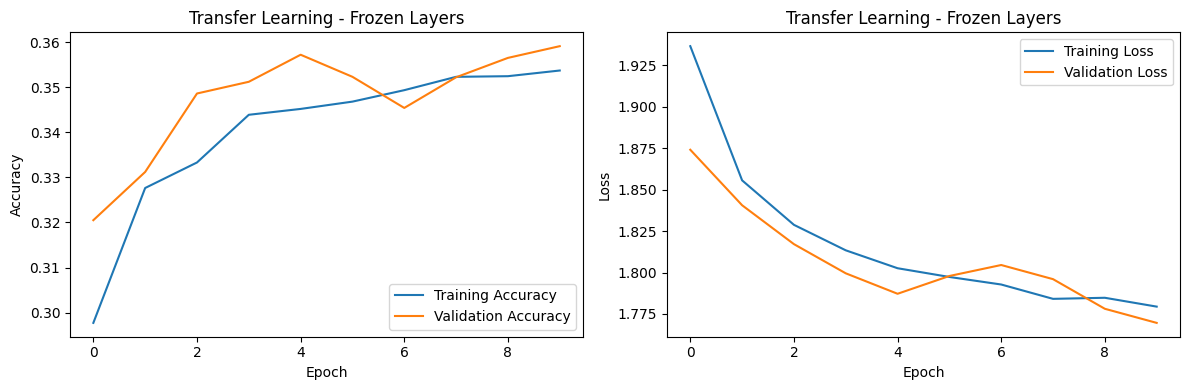

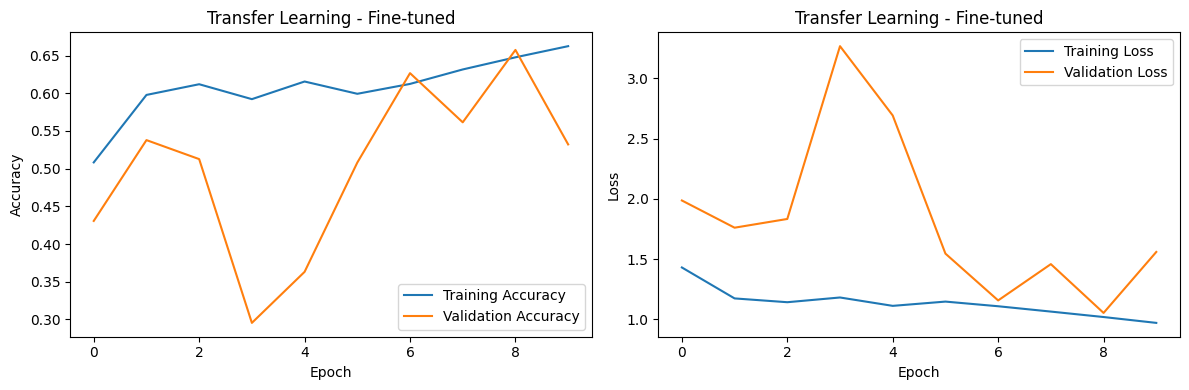

In [9]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_frozen.history['accuracy'], label='Training Accuracy')
plt.plot(history_frozen.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning - Frozen Layers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_frozen.history['loss'], label='Training Loss')
plt.plot(history_frozen.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning - Frozen Layers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting training and validation accuracy for fine-tuning
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_fine_tuned.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tuned.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning - Fine-tuned')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss for fine-tuning
plt.subplot(1, 2, 2)
plt.plot(history_fine_tuned.history['loss'], label='Training Loss')
plt.plot(history_fine_tuned.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning - Fine-tuned')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


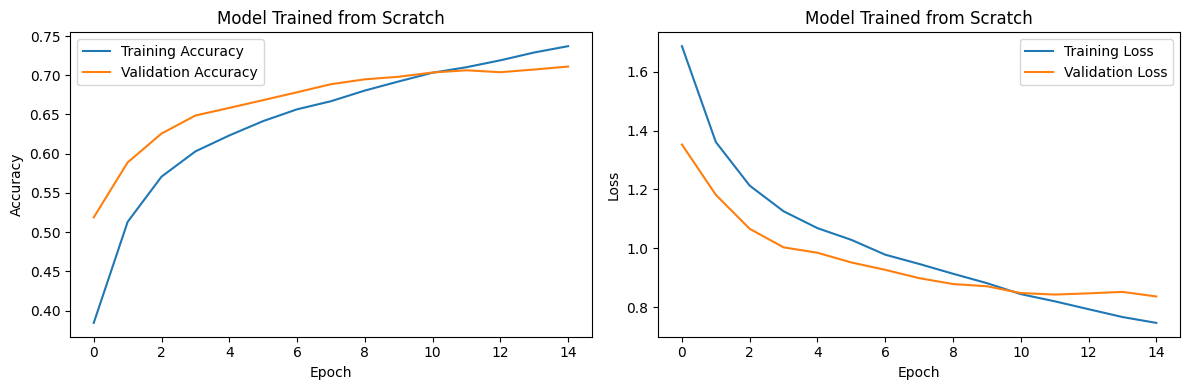

In [10]:
# Plotting training and validation accuracy for model trained from scratch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_scratch.history['accuracy'], label='Training Accuracy')
plt.plot(history_scratch.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Trained from Scratch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss for model trained from scratch
plt.subplot(1, 2, 2)
plt.plot(history_scratch.history['loss'], label='Training Loss')
plt.plot(history_scratch.history['val_loss'], label='Validation Loss')
plt.title('Model Trained from Scratch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 [==============================] - 2s 7ms/step


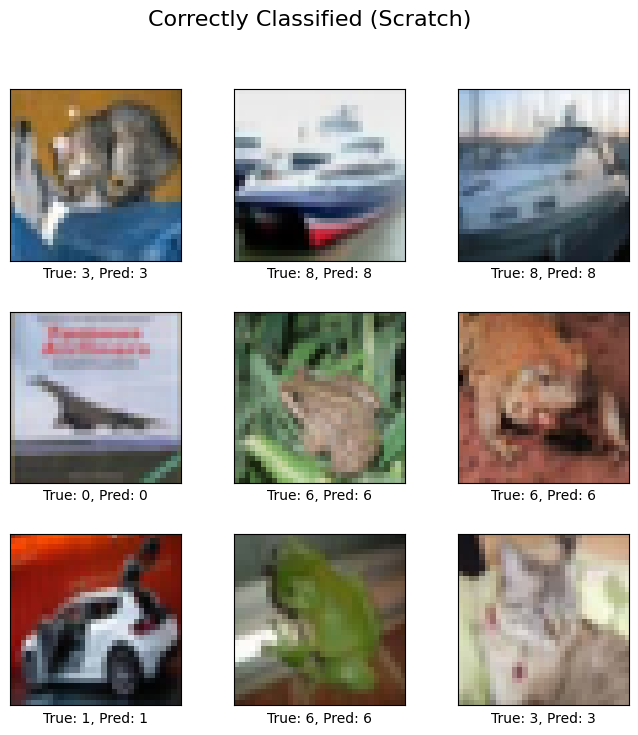

<Figure size 640x480 with 0 Axes>

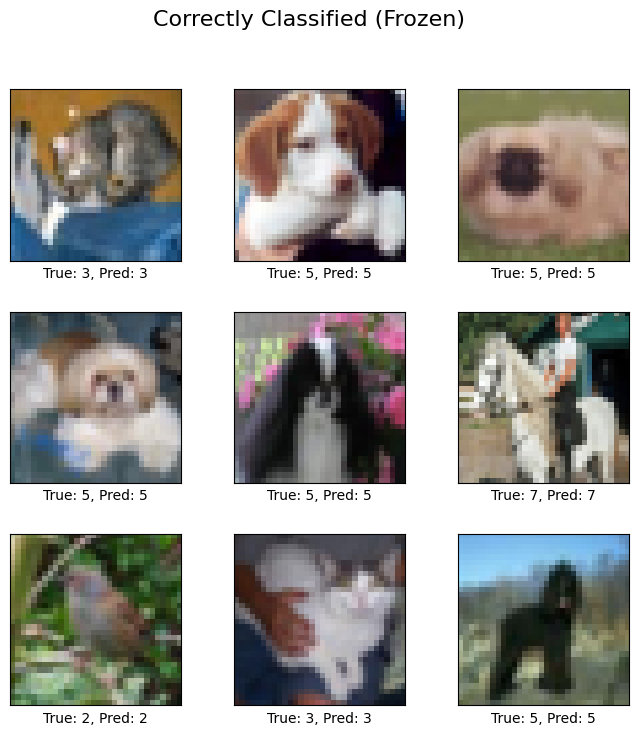

<Figure size 640x480 with 0 Axes>

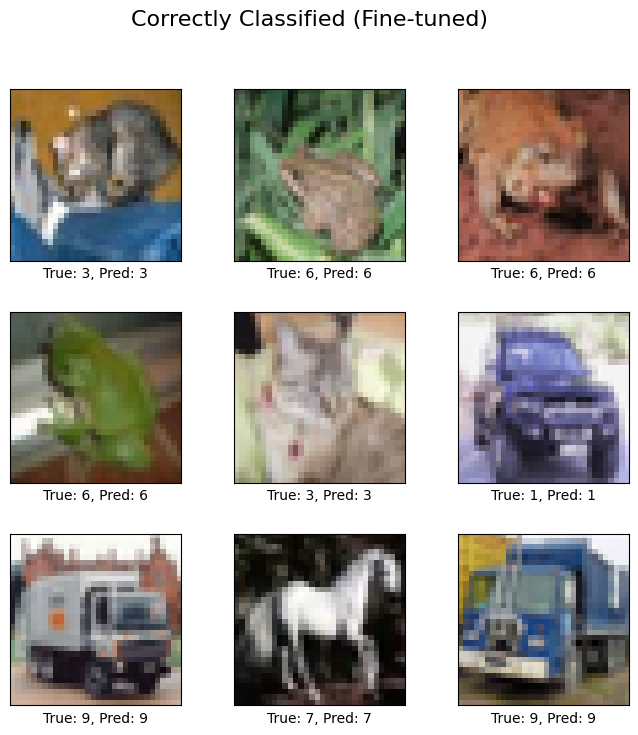

<Figure size 640x480 with 0 Axes>

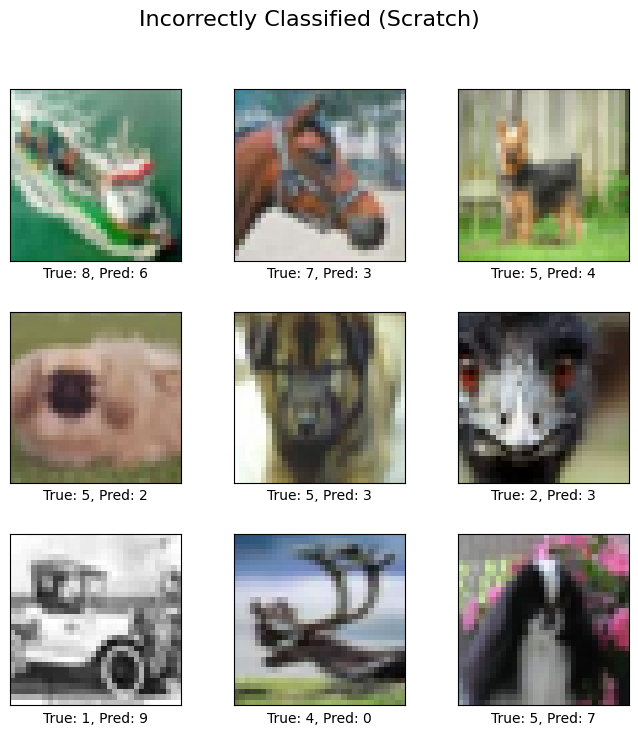

<Figure size 640x480 with 0 Axes>

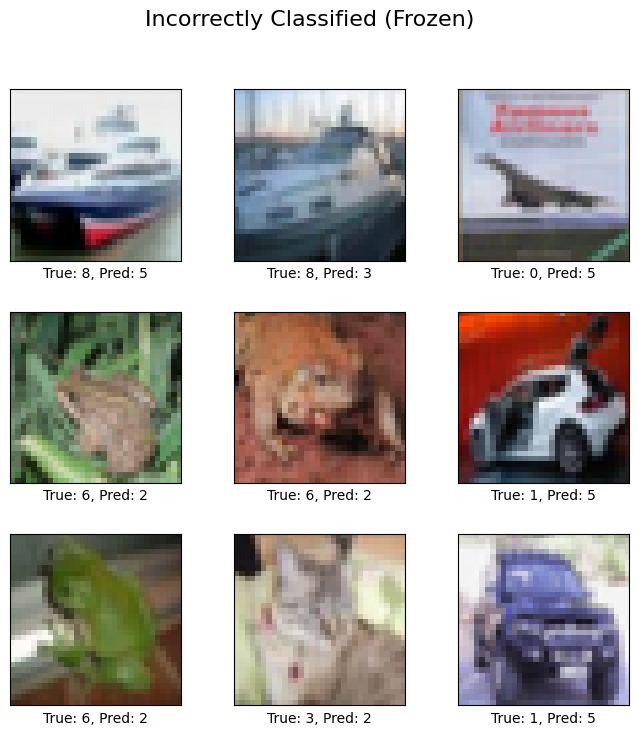

<Figure size 640x480 with 0 Axes>

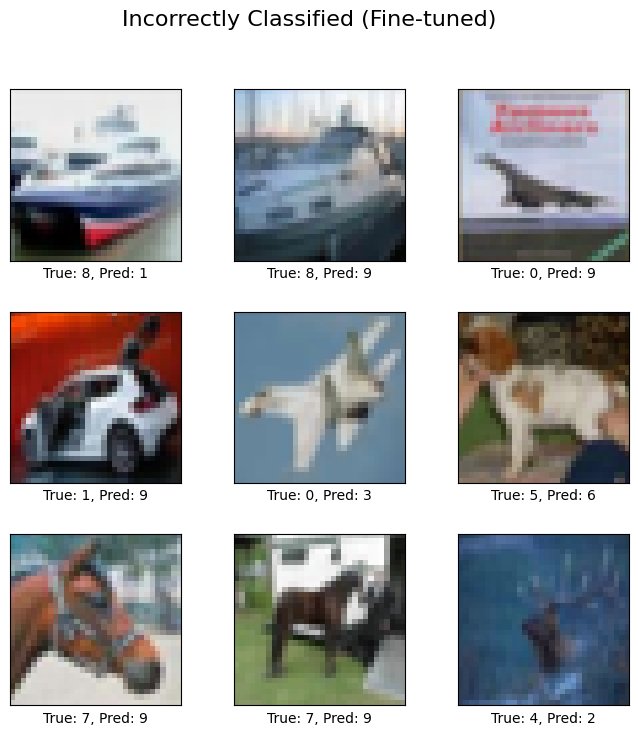

In [12]:
def plot_images(images, labels_true, labels_pred=None, title=None):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(32, 32, 3), cmap='binary')

        # Show true and predicted classes.
        if labels_pred is None:
            xlabel = "True: {0}".format(labels_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(labels_true[i], labels_pred[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

    if title:
        plt.suptitle(title, size=16)

    plt.show()

# Get predictions for the test set
predictions_scratch = s_model.predict(x_test)
predictions_frozen = frozen_model.predict(x_test)
predictions_fine_tuned = unfrozen_model.predict(x_test)

# Convert predictions to class labels
labels_pred_scratch = np.argmax(predictions_scratch, axis=1)
labels_pred_frozen = np.argmax(predictions_frozen, axis=1)
labels_pred_fine_tuned = np.argmax(predictions_fine_tuned, axis=1)

# Get true labels
labels_true = np.argmax(y_test, axis=1)

# Find correctly and incorrectly classified indices
correctly_classified_scratch = np.where(labels_pred_scratch == labels_true)[0]
incorrectly_classified_scratch = np.where(labels_pred_scratch != labels_true)[0]

correctly_classified_frozen = np.where(labels_pred_frozen == labels_true)[0]
incorrectly_classified_frozen = np.where(labels_pred_frozen != labels_true)[0]

correctly_classified_fine_tuned = np.where(labels_pred_fine_tuned == labels_true)[0]
incorrectly_classified_fine_tuned = np.where(labels_pred_fine_tuned != labels_true)[0]

# Visualize correctly classified images for each model
plot_images(x_test[correctly_classified_scratch], labels_true[correctly_classified_scratch],
            labels_pred_scratch[correctly_classified_scratch], title="Correctly Classified (Scratch)")

plt.figure()  # Create a new figure for the next plot

plot_images(x_test[correctly_classified_frozen], labels_true[correctly_classified_frozen],
            labels_pred_frozen[correctly_classified_frozen], title="Correctly Classified (Frozen)")

plt.figure()  # Create a new figure for the next plot

plot_images(x_test[correctly_classified_fine_tuned], labels_true[correctly_classified_fine_tuned],
            labels_pred_fine_tuned[correctly_classified_fine_tuned], title="Correctly Classified (Fine-tuned)")

# Visualize incorrectly classified images for each model
plt.figure()  # Create a new figure for the next set of plots

plot_images(x_test[incorrectly_classified_scratch], labels_true[incorrectly_classified_scratch],
            labels_pred_scratch[incorrectly_classified_scratch], title="Incorrectly Classified (Scratch)")

plt.figure()  # Create a new figure for the next plot

plot_images(x_test[incorrectly_classified_frozen], labels_true[incorrectly_classified_frozen],
            labels_pred_frozen[incorrectly_classified_frozen], title="Incorrectly Classified (Frozen)")

plt.figure()  # Create a new figure for the next plot

plot_images(x_test[incorrectly_classified_fine_tuned], labels_true[incorrectly_classified_fine_tuned],
            labels_pred_fine_tuned[incorrectly_classified_fine_tuned], title="Incorrectly Classified (Fine-tuned)")

plt.show()  # Display all the separate plots
